In [1]:
import pandas as pd
import numpy as np
import json
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics

In [2]:
data = pd.read_csv('main_task.csv')

In [3]:
data.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [4]:
data.drop(['Restaurant_id','URL_TA', 'ID_TA'], axis = 1, inplace=True)

In [5]:
data.head()

,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews
0,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ..."
1,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']..."
2,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],..."
3,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]"
4,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b..."


In [6]:
def get_cuisines(cuisines):
    '''
    Получаем список кухонь в виде:
    cuisines[0] - list of cusines
    если был NaN, то возвращается 'Regionl Cusine' -как самая популярная в регионе/городе/стране
    '''
    if cuisines == 'NaN': return ['Regionl Cusine']#['Vegetarian Friendly'] # 'Vegetarian Friendly' - самая популярная
    if  cuisines:
        cuisines = str(cuisines).replace("'",'"')
        return json.loads(cuisines)
    else:
        return ['Regionl Cusine'] #return ['Vegetarian Friendly']

In [7]:
allCusines = []
def cuisine_styles_count(row):
    '''
    Получаем количество кухонь
    '''
    global allCusines
    cusines = get_cuisines(row['Cuisine Style'])
    
    if row['Cuisine Style'] != 'NaN':    
        cusines = get_cuisines(row['Cuisine Style'])
        allCusines.extend(cusines)
        cuisines_count =len(cusines)
    else:
        cuisines_count = 1

    return cuisines_count

In [8]:
df = data

df['Cuisine Style'] = df['Cuisine Style'].fillna('NaN')
df['Cuisine Style NAN'] = df['Cuisine Style'].apply(lambda x: 1 if x =='NaN' else 0)
df['Cuisines Count'] = df.apply(cuisine_styles_count, axis=1)

most_popular_cusine = pd.Series(allCusines).value_counts().index[0]
average_cousines_count = np.round(df['Cuisines Count'].mean(),1)

In [9]:
df.head()

,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,Cuisine Style NAN,Cuisines Count
0,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",0,3
1,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",1,1
2,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",0,7
3,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",1,1
4,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",0,3


In [10]:
dic_value_Price = {'$':1,'$$ - $$$':2,'$$$$':3}
df['Price Range']=df['Price Range'].map(lambda x: dic_value_Price.get(x,x))

# 18412 ресторанов это более 70% из заполненной информации имеют средний параметр цены
# поэтому заполняем пропуски двойкой (2)
df['Price Range'] = df['Price Range'].fillna(2)

In [11]:
df

,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,Cuisine Style NAN,Cuisines Count
0,Paris,"['European', 'French', 'International']",5570.0,3.5,2.0,194.0,"[['Good food at your doorstep', 'A good hotel ...",0,3
1,Stockholm,NaN,1537.0,4.0,2.0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",1,1
2,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,3.0,688.0,"[['Catch up with friends', 'Not exceptional'],...",0,7
3,Berlin,NaN,3458.0,5.0,2.0,3.0,"[[], []]",1,1
4,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,2.0,84.0,"[['Best place to try a Bavarian food', 'Nice b...",0,3
...,...,...,...,...,...,...,...,...,...
39995,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,2.0,79.0,"[['The real Italian experience!', 'Wonderful f...",0,4
39996,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,2.0,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",0,5
39997,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,2.0,4.0,"[['Good by swedish standards', 'A hidden jewel...",0,2
39998,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,2.0,70.0,"[['Underground restaurant', 'Oldest Restaurant...",0,5


In [12]:
# вытащим дату из ревью и создадим новые критерии
df['date_of_Review'] = df['Reviews'].str.findall('\d+/\d+/\d+')
df['len_date'] = df['date_of_Review'].apply(lambda x: len(x))

In [13]:
print("кол-во значений Reviews с тремя датами :=" , len(df[df['len_date']==3]))

кол-во значений Reviews с тремя датами := 2


In [14]:
print("значения Reviews с тремя датами :=")
temp_list = df[df['len_date']==3].Reviews.to_list()
display(df[df['len_date']==3].Reviews.to_list())

значения Reviews с тремя датами :=


["[['The desserts arcade !', 'Visit today 3/1/2017'], ['06/02/2017', '01/03/2017']]",
 "[['lunch 29/9/2016', 'Unplanned Great Dinner'], ['09/30/2016', '08/25/2016']]"]

In [15]:
df['len_date'].date_of_Review = df[df['len_date']==3].date_of_Review.apply(lambda x: x.pop(0))

In [16]:
print("кол-во значений Reviews с одной датой :=" , len(df[df['len_date']==1]))
display(df[df['len_date']==1].Reviews[:4])

кол-во значений Reviews с одной датой := 4556


16    [['This is a real hidden Sushi-gem'], ['04/12/...
26    [['Heavenly meat slices and craft beer too.'],...
27    [['Good value canteen lunch stop.'], ['01/26/2...
28                       [['Fab Food'], ['08/20/2011']]
Name: Reviews, dtype: object

In [17]:
df['one_Review'] = (df['len_date']==1).astype('float64')

# заполним перерыв между отзывами (по отзывам где len = 2) и насколько давно был сделан последний самый свежий отзыв
# создадим для этого функции:
def time_to_now(row):
    if row['date_of_Review'] == []:
        return None
    return dt.datetime.now() - pd.to_datetime(row['date_of_Review']).max()

def time_between_Reviews(row):
    if row['date_of_Review'] == []:
        return None
    return pd.to_datetime(row['date_of_Review']).max() - pd.to_datetime(row['date_of_Review']).min()

df['day_to_now'] = df.apply(time_to_now, axis = 1).dt.days
df['day_between_Reviews'] = df[df['len_date']==2].apply(time_between_Reviews, axis = 1).dt.days

In [18]:
df['day_between_Reviews'].fillna(0, inplace=True)
df['day_to_now'].fillna(df['day_to_now'].mean(), inplace=True)
df.drop(['Reviews', 'date_of_Review'], axis = 1, inplace=True)

In [19]:
def get_Weighed_Rank_RK(row):
    '''
    Вычисляем относительную позицию ресторана среди всех ресторанов города
    '''
    Weighed_Rank = row['Ranking'] / row['Restaurants Count']

    return Weighed_Rank

In [20]:
restorants_in_city = df.groupby('City')['Ranking'].count().to_dict()
df['Restaurants Count'] = df['City'].map(restorants_in_city)
df['Weighed Rank'] = df.apply(lambda x: get_Weighed_Rank_RK(x), axis=1)
df.drop(['Ranking'], axis = 1, inplace=True)

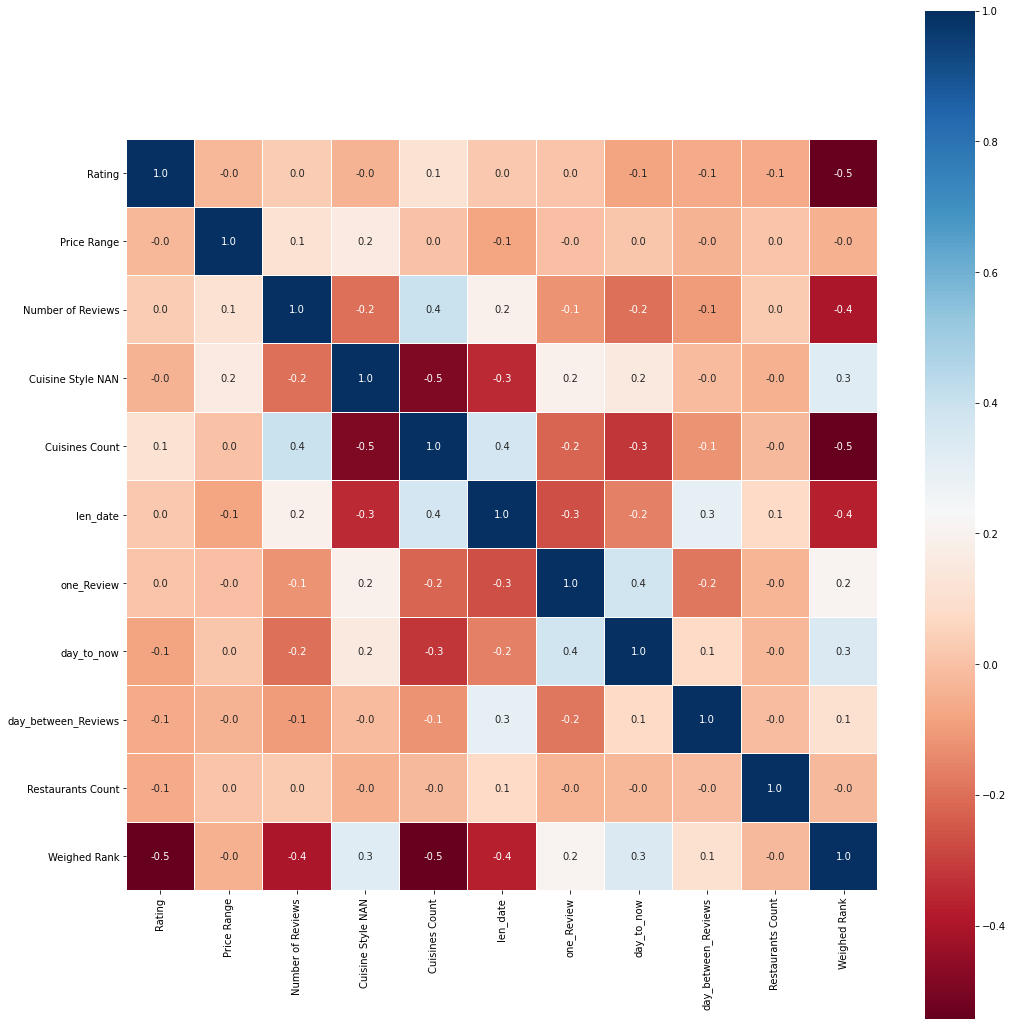

In [21]:
plt.rcParams['figure.figsize'] = (15,15)
sns.heatmap(df.corr(), square=True,
            annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu");
plt.tight_layout()

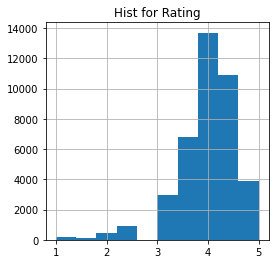

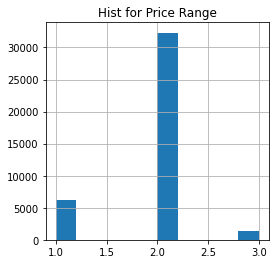

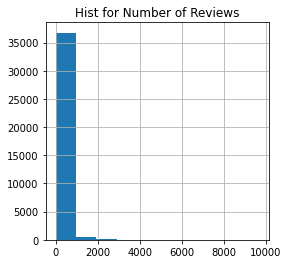

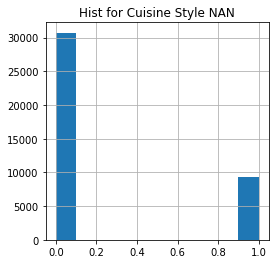

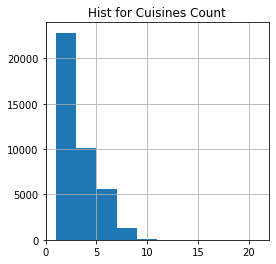

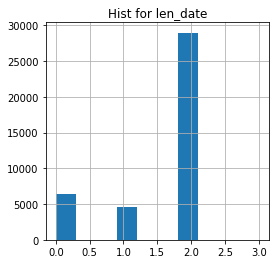

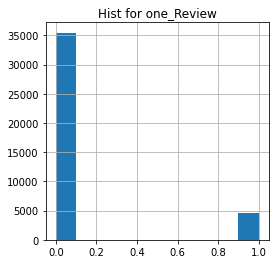

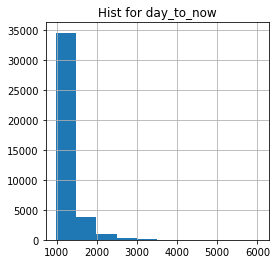

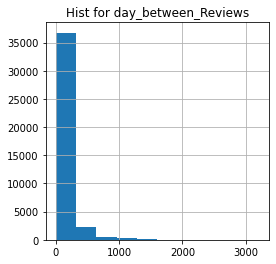

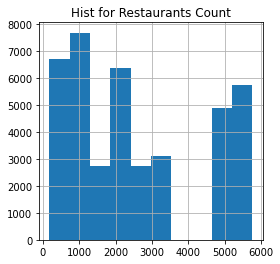

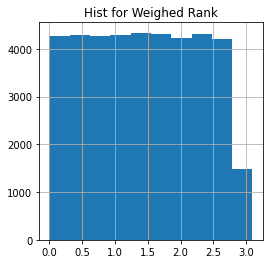

In [27]:
def num_column_hist (column):
    fid, ax = plt.subplots(figsize = (4, 4))
    ax.set_title(f'Hist for {column}')
    df[column].hist()
    plt.show()
num_column = list(df.select_dtypes(include=['float64', 'int64']).columns)
for column in num_column:
    num_column_hist(column)

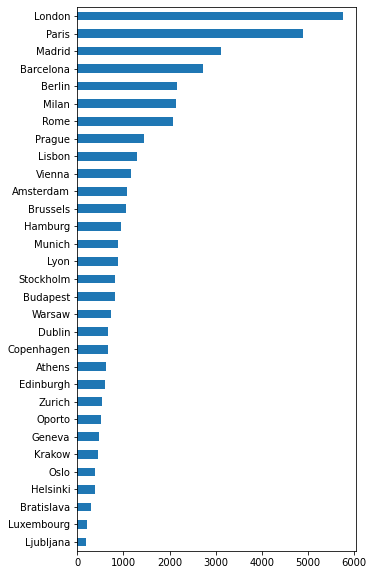

In [32]:
df['City'].value_counts(ascending=True).plot(kind='barh');

In [22]:
# Сокращаем список кухонь для анализа до N - основных, остальные Other - это почти всегда дает улучшение предсказания
N=15 #!!!

s = df['Cuisine Style'].apply(lambda x: get_cuisines(x))
slist =[]
for x in s:
    slist.extend(x)
topNcusines = list(pd.Series(slist).value_counts()[:N].index)
topNcusines.append('Other')

In [23]:
for cusine in topNcusines:
    df[cusine] = df['Cuisine Style'].apply(lambda x: 1 if cusine in x else 0)

In [24]:
df.drop('Cuisine Style', axis = 1, inplace=True)

In [29]:
df

,City,Rating,Price Range,Number of Reviews,Cuisine Style NAN,Cuisines Count,len_date,one_Review,day_to_now,day_between_Reviews,...,Gluten Free Options,Bar,French,Asian,Pizza,Spanish,Pub,Cafe,Fast Food,Other
0,Paris,3.5,2.0,194.0,0,3,2,0.0,1033.000000,41.0,...,0,0,1,0,0,0,0,0,0,0
1,Stockholm,4.0,2.0,10.0,1,1,2,0.0,1211.000000,382.0,...,0,0,0,0,0,0,0,0,0,0
2,London,4.5,3.0,688.0,0,7,2,0.0,1025.000000,2.0,...,1,0,0,1,0,0,0,0,0,0
3,Berlin,5.0,2.0,3.0,1,1,0,0.0,1265.366161,0.0,...,0,0,0,0,0,0,0,0,0,0
4,Munich,4.0,2.0,84.0,0,3,2,0.0,1076.000000,272.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,Milan,4.5,2.0,79.0,0,4,2,0.0,1048.000000,34.0,...,1,0,0,0,0,0,0,0,0,0
39996,Paris,3.5,2.0,542.0,0,5,2,0.0,1043.000000,9.0,...,0,1,1,0,0,0,0,0,0,0
39997,Stockholm,4.5,2.0,4.0,0,2,2,0.0,1456.000000,3127.0,...,0,0,0,0,0,0,0,0,0,0
39998,Warsaw,4.0,2.0,70.0,0,5,2,0.0,1206.000000,23.0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 40000 non-null  object 
 1   Rating               40000 non-null  float64
 2   Price Range          40000 non-null  float64
 3   Number of Reviews    37457 non-null  float64
 4   Cuisine Style NAN    40000 non-null  int64  
 5   Cuisines Count       40000 non-null  int64  
 6   len_date             40000 non-null  int64  
 7   one_Review           40000 non-null  float64
 8   day_to_now           40000 non-null  float64
 9   day_between_Reviews  40000 non-null  float64
 10  Restaurants Count    40000 non-null  int64  
 11  Weighed Rank         40000 non-null  float64
 12  Vegetarian Friendly  40000 non-null  int64  
 13  European             40000 non-null  int64  
 14  Regionl Cusine       40000 non-null  int64  
 15  Mediterranean        40000 non-null 

In [31]:
df_City_dummies = pd.get_dummies(df['City'], dummy_na=False).astype('float64')
df = pd.concat([df,df_City_dummies], axis=1)

In [37]:
df['Number of Reviews'].fillna(round(df['Number of Reviews'].mean()), inplace=True)

In [36]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 59 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 40000 non-null  object 
 1   Rating               40000 non-null  float64
 2   Price Range          40000 non-null  float64
 3   Number of Reviews    40000 non-null  float64
 4   Cuisine Style NAN    40000 non-null  int64  
 5   Cuisines Count       40000 non-null  int64  
 6   len_date             40000 non-null  int64  
 7   one_Review           40000 non-null  float64
 8   day_to_now           40000 non-null  float64
 9   day_between_Reviews  40000 non-null  float64
 10  Restaurants Count    40000 non-null  int64  
 11  Weighed Rank         40000 non-null  float64
 12  Vegetarian Friendly  40000 non-null  int64  
 13  European             40000 non-null  int64  
 14  Regionl Cusine       40000 non-null  int64  
 15  Mediterranean        40000 non-null 

In [40]:
X = df.drop(['City','Rating'], axis = 1)
y = df['Rating']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.2054035
